# Previsão de Churn: Análise, Tratamento de Dados e Machine Learning com Python

**Portfólio por Matheus Amaral da Rocha**

In [ ]:
# Importando as bibliotecas fundamentais e as que escolhemos como opção que se encaixam melhor
# para esse tipo de projeto

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [12]:
# 1. Importação do CSV
df = pd.read_csv("Churn Modeling.csv")

In [13]:
# 2. Análise exploratória
display(df.head())  # Visualiza as primeiras linhas
display(df.info())  # Informações gerais das colunas
display(df.describe())  # Estatísticas básicas

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


None

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [14]:
# 3. Tratamento de dados
# Removendo colunas irrelevantes
df.drop(columns=["RowNumber", "CustomerId", "Surname"], inplace=True)

In [15]:
# Codificando variáveis categóricas
le_geography = LabelEncoder()
le_gender = LabelEncoder()
df["Geography"] = le_geography.fit_transform(df["Geography"])
df["Gender"] = le_gender.fit_transform(df["Gender"])

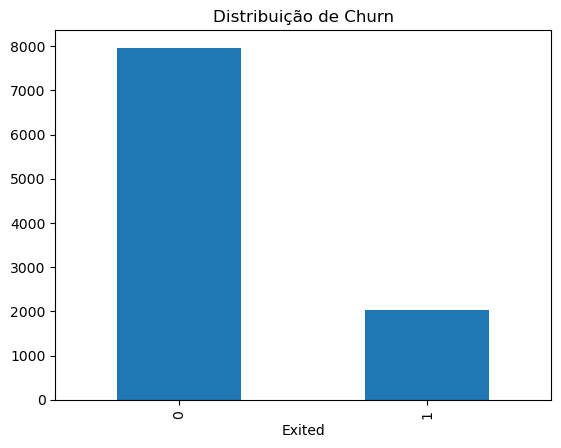

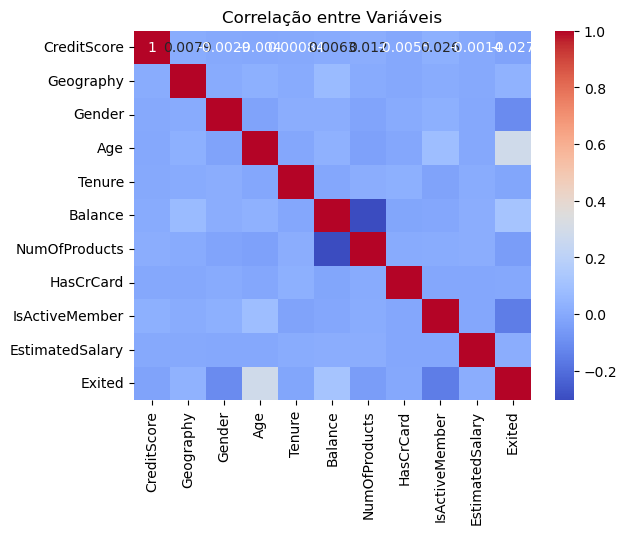

In [16]:
# 4. Análise gráfica
df["Exited"].value_counts().plot(kind='bar', title="Distribuição de Churn")
plt.show()

sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlação entre Variáveis")
plt.show()

In [17]:
# 5. Preparação dos dados para Machine Learning
X = df.drop(columns=["Exited"])
y = df["Exited"]

In [18]:
# Normalização\scaler = StandardScaler()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [19]:
# Divisão dos dados
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [20]:
# 6. Modelos de Machine Learning
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "Logistic Regression": LogisticRegression()
}

Random Forest - Accuracy: 0.8640
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.47      0.57       393

    accuracy                           0.86      2000
   macro avg       0.81      0.71      0.75      2000
weighted avg       0.85      0.86      0.85      2000



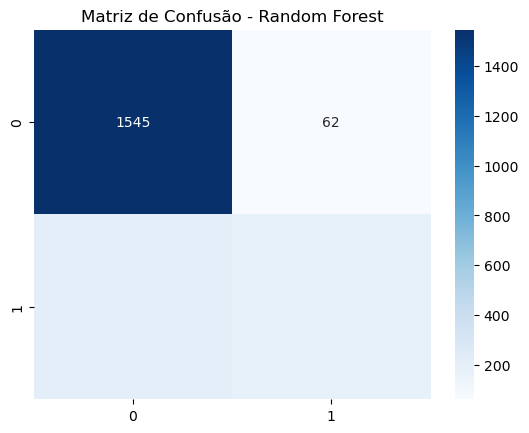

Gradient Boosting - Accuracy: 0.8655
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.47      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.86      0.87      0.85      2000



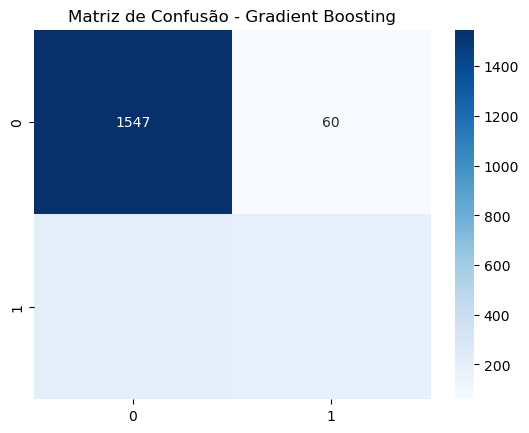

Logistic Regression - Accuracy: 0.8150
              precision    recall  f1-score   support

           0       0.83      0.97      0.89      1607
           1       0.60      0.18      0.28       393

    accuracy                           0.81      2000
   macro avg       0.71      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000



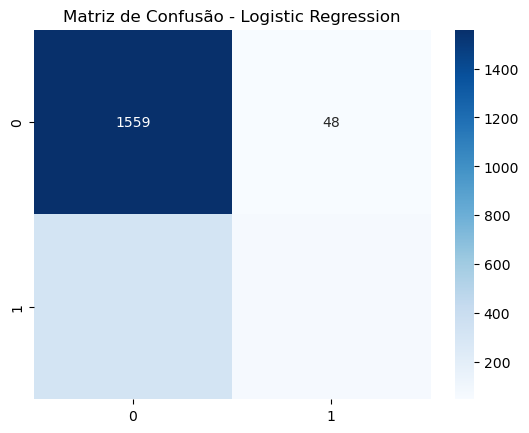

In [ ]:
# Treinamento e avaliação
def evaluate_model(model, name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name} - Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(classification_report(y_test, y_pred))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f"Matriz de Confusão - {name}")
    plt.show()

for name, model in models.items():
    evaluate_model(model, name)

# Insights fundamentais que eu daria para ajudar a empresa a tentar solucionar o problema:

# - A empresa pode focar em clientes com saldo alto e poucos produtos, pois esses parecem ter maior propensão ao churn.
# - Estratégias como programas de fidelidade, personalização de ofertas e suporte ao cliente podem ser usadas para reduzir o churn e aumentar a retenção.



.
# Este projeto fornece uma abordagem completa para a previsão de churn, desde a análise e tratamento de dados até a aplicação de modelos de machine learning. Utilizando Python, exploramos o dataset, realizamos transformações necessárias e testamos três modelos distintos para avaliar sua precisão. Os insights obtidos podem ser usados para otimizar estratégias de retenção de clientes e tomada de decisão.